In [54]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [55]:
df = pd.read_csv('height-weight.csv')

In [81]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


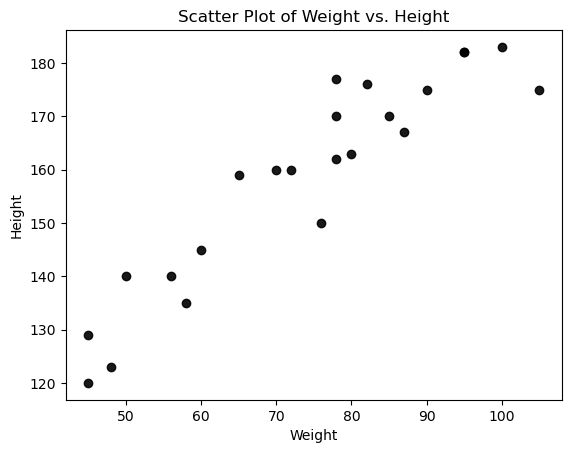

In [57]:

#  scatter plot
plt.scatter(df['Weight'], df['Height'], color='black', alpha=0.9)
plt.title('Scatter Plot of Weight vs. Height')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()


In [58]:
#corelation
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


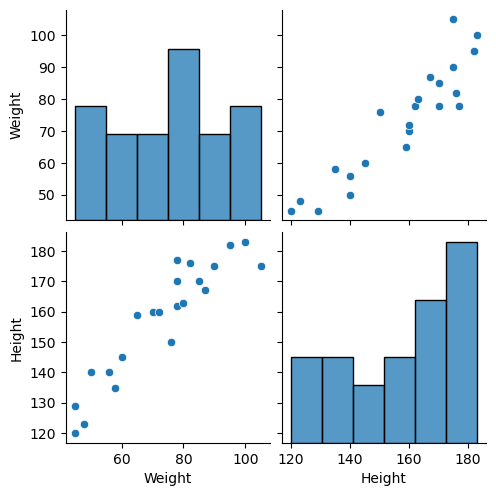

In [59]:
import seaborn as sns
sns.pairplot(df)
plt.show()

In [60]:
## Independent and dependent features
X = df[['Weight']] ### Independent feature should be data frame or 2 dim array
y = df[['Height']] ### this variable can be in series or 1d array

In [61]:
X_series= df['Weight']
np.array(X_series).shape

(23,)

In [62]:
np.array(y).shape

(23, 1)

In [63]:
## Train Test Split
from sklearn.model_selection import train_test_split


In [64]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42)

In [65]:
## Standardization
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.fit_transform(X_test)

In [66]:
X_test

array([[ 0.01711717],
       [ 0.01711717],
       [-1.67748224],
       [ 0.89009262],
       [-0.6504523 ],
       [ 1.40360759]])

In [67]:
from sklearn.linear_model import LinearRegression

In [68]:
regression = LinearRegression()

In [69]:
regression.fit(X_train,y_train)

LinearRegression()

In [70]:
regression.coef_

array([[17.2982057]])

In [71]:
regression.intercept_

array([156.47058824])

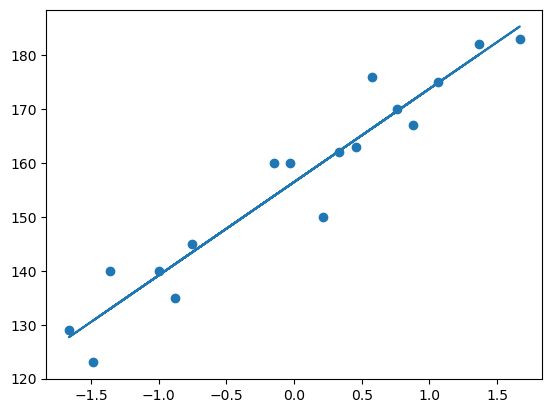

In [72]:
## plot traning data and best fit line
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train))
plt.show()

In [73]:
### Prediction of the test data
y_pred = regression.predict(X_test)

In [74]:
## Performance Matrics
from sklearn.metrics import mean_absolute_error,mean_squared_error


In [75]:
mse =mean_squared_error(y_test,y_pred)
mae =mean_absolute_error(y_test, y_pred)
rmse =np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

160.95146497458572
11.76395723317914
12.686664848358914


In [83]:
from sklearn.metrics import r2_score

In [85]:
score=r2_score(y_test,y_pred)
print(score)

0.6301147309872273


In [87]:
## Display adjusted R-squared
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.537643413734034

In [91]:
## OLS linear Regression
import statsmodels.api as sm

In [93]:
model = sm.OLS(y_train, X_train).fit()

In [95]:
prediction =model.predict(X_test)
print(prediction)

[  0.29609625   0.29609625 -29.0174329   15.39700521 -11.25165765
  24.27989283]


In [99]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Wed, 25 Dec 2024   Prob (F-statistic):                       0.664
Time:                        11:50:50   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\Sourav\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  res = hypotest_fun_out(*samples, **kwds)


In [103]:
## Prediction for new data
regression.predict(scalar.transform([[64]]))

C:\Users\Sourav\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[144.33064182]])